In [1]:
import os
import shutil
from pathlib import Path
import random
import yaml

In [2]:
! pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [3]:
dataset_path = Path('/kaggle/input/atomichack')
output_path = Path('/kaggle/working/yolo_dataset/')
images_path = output_path / 'images'
labels_path = output_path / 'labels'

In [4]:
(images_path / 'train').mkdir(parents=True, exist_ok=True)
(images_path / 'val').mkdir(parents=True, exist_ok=True)
(labels_path / 'train').mkdir(parents=True, exist_ok=True)
(labels_path / 'val').mkdir(parents=True, exist_ok=True)

In [5]:
image_files = sorted([f for f in dataset_path.glob('*.jpg')])
annotation_files = sorted([f for f in dataset_path.glob('*.txt')])

In [6]:
data = list(zip(image_files, annotation_files))
random.shuffle(data)
image_files, annotation_files = zip(*data)

In [7]:
split_index = int(0.8 * len(image_files))
train_images = image_files[:split_index]
train_annotations = annotation_files[:split_index]
val_images = image_files[split_index:]
val_annotations = annotation_files[split_index:]

In [8]:
for img_file, ann_file in zip(train_images, train_annotations):
    shutil.copy(img_file, images_path / 'train' / img_file.name)
    shutil.copy(ann_file, labels_path / 'train' / ann_file.name)

for img_file, ann_file in zip(val_images, val_annotations):
    shutil.copy(img_file, images_path / 'val' / img_file.name)
    shutil.copy(ann_file, labels_path / 'val' / ann_file.name)

In [9]:
data_yaml = {
    'train': str(images_path / 'train'),
    'val': str(images_path / 'val'),
    'nc': 5,
    'names': ['adj', 'int', 'geo', 'pro', 'non']
}

In [10]:
with open(output_path / 'data.yaml', 'w') as yaml_file:
    yaml.dump(data_yaml, yaml_file, default_flow_style=False)

In [11]:
! pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-4w5mpu4d
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-4w5mpu4d
  Resolved https://github.com/ultralytics/ultralytics.git to commit e5477713ddc5d5eaafb9985c2f5e5c7635119447
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.2.32-py3-none-any.whl size=780638 sha256=29d352a83a7e1ca1263c6c1e5e471e04e38e91a4a3c8e44b87b2eb4d5d0c3947
  Stored in directory: /tmp/pip-ephem-wheel-cache-2th2ufgf/wheels/60/db/e5/6abbdd13b4e3d5e2fdcd87690cd8738f842eeb37142fdccb5b
Successfully built ultralytics


In [12]:
import torch 
import torchvision

In [13]:
from ultralytics import YOLO

In [18]:
model = YOLO('yolov8x.pt')
model.to('cuda')

model.train(data='/kaggle/working/yolo_dataset/data.yaml',
            epochs=100,
            imgsz=640,
            seed=42,
            batch=8,
            workers=4)

engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/yolo_dataset/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=4, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=

train: Scanning /kaggle/working/yolo_dataset/labels/train.cache... 929 images, 115 backgrounds, 0 corrupt: 100%|██████████| 929/929 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/yolo_dataset/labels/val.cache... 233 images, 25 backgrounds, 0 corrupt: 100%|██████████| 233/233 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.18G      2.426      3.245      1.772          7        640: 100%|██████████| 117/117 [01:23<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]

                   all        233        684      0.331     0.0678      0.066     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.87G      2.372      2.362      1.782          6        640: 100%|██████████| 117/117 [01:21<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.79it/s]

                   all        233        684      0.252      0.257      0.187     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.86G      2.348      2.239       1.78          8        640: 100%|██████████| 117/117 [01:20<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]

                   all        233        684      0.564      0.147      0.164     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.84G      2.305      2.135      1.737          1        640: 100%|██████████| 117/117 [01:20<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]

                   all        233        684      0.541      0.164      0.151     0.0461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.88G      2.241      2.023      1.699          6        640: 100%|██████████| 117/117 [01:20<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]

                   all        233        684      0.371      0.288      0.261     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.89G      2.148      1.853      1.657          5        640: 100%|██████████| 117/117 [01:20<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.10it/s]

                   all        233        684      0.509       0.44      0.419      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.87G      2.112       1.74      1.626          9        640: 100%|██████████| 117/117 [01:19<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]

                   all        233        684      0.308      0.381      0.301      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.61G      2.097      1.666      1.601         15        640: 100%|██████████| 117/117 [01:19<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]


                   all        233        684      0.632      0.445      0.491      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.86G      2.017      1.592      1.557          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]

                   all        233        684      0.457      0.507      0.475      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.89G      1.976      1.528      1.505          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.22it/s]


                   all        233        684       0.54       0.48      0.486        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.89G       1.94      1.449      1.502          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]

                   all        233        684      0.622      0.541      0.557      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.87G      1.926      1.426      1.483          6        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]

                   all        233        684      0.609      0.618      0.605      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.88G      1.872       1.34      1.482          4        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.40it/s]


                   all        233        684      0.685      0.619      0.643      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.88G      1.863      1.313      1.448          2        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]

                   all        233        684      0.753      0.581       0.63      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.88G      1.814      1.293      1.444          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.54it/s]


                   all        233        684      0.767      0.576      0.693      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       8.6G      1.786      1.217      1.423          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        233        684      0.789      0.596      0.674      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.86G      1.794      1.178      1.397          8        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.48it/s]

                   all        233        684      0.751      0.611      0.691      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.88G      1.761      1.175      1.402          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.22it/s]


                   all        233        684      0.684      0.661      0.674      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.89G       1.77      1.141      1.394          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.48it/s]


                   all        233        684      0.672      0.628      0.672      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.86G      1.744      1.109      1.387          4        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]

                   all        233        684      0.707      0.654      0.697      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.88G      1.725      1.115      1.385          4        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.54it/s]

                   all        233        684      0.714      0.649      0.712      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.86G      1.715      1.077      1.385          4        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.28it/s]

                   all        233        684      0.745      0.678      0.725      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.88G      1.669      1.041      1.343          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.46it/s]


                   all        233        684      0.803      0.652      0.746      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       8.6G      1.652      1.013      1.334          6        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.53it/s]


                   all        233        684      0.835      0.687      0.782      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.87G      1.621     0.9954       1.34          9        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]


                   all        233        684      0.793      0.715       0.76      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.87G       1.62     0.9685       1.31          8        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.31it/s]

                   all        233        684      0.812      0.706      0.772      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.87G      1.626     0.9667      1.314          7        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.41it/s]


                   all        233        684      0.807       0.72      0.773      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.85G      1.611     0.9748      1.311          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


                   all        233        684       0.74      0.716      0.759      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.88G      1.616     0.9768      1.324          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]

                   all        233        684      0.786      0.711      0.786      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.88G      1.601     0.9622      1.311          7        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.49it/s]

                   all        233        684      0.789      0.705       0.77      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.87G      1.553     0.9172      1.287          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


                   all        233        684      0.844       0.71      0.799      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       8.6G      1.545     0.8772      1.271          6        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.50it/s]

                   all        233        684      0.793      0.742      0.801      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.87G      1.554      0.894      1.272          7        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.48it/s]


                   all        233        684      0.786      0.707       0.79      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.88G       1.51      0.881      1.261          8        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.33it/s]


                   all        233        684      0.788      0.699      0.769      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.88G      1.518     0.8723      1.264          2        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.27it/s]

                   all        233        684      0.814      0.753      0.811      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.86G      1.496     0.8395      1.238          6        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]

                   all        233        684       0.84      0.734      0.798      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.88G      1.498     0.8434      1.255          6        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]


                   all        233        684      0.844      0.763      0.825      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.88G      1.481     0.8099      1.253          6        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]

                   all        233        684       0.84      0.761      0.826        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.88G      1.469     0.8271      1.232          2        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]

                   all        233        684      0.827      0.774      0.825      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.63G      1.438     0.8112      1.219          0        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]

                   all        233        684      0.812      0.783      0.816      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.89G      1.472     0.8065      1.244          6        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]

                   all        233        684       0.83      0.803      0.837      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.88G      1.424     0.7849      1.213          7        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]

                   all        233        684      0.834      0.769      0.824      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.86G      1.412     0.7726      1.224          2        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.48it/s]

                   all        233        684      0.858      0.756      0.804      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.86G      1.408     0.7918      1.218          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.25it/s]


                   all        233        684      0.835      0.774       0.84      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.89G      1.415     0.7705      1.227          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        233        684      0.817       0.77      0.822      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.88G      1.398     0.7558      1.204          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]

                   all        233        684      0.828      0.802      0.863      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.89G      1.385     0.7395      1.186          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.49it/s]

                   all        233        684      0.831      0.783      0.837      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       8.6G      1.377     0.7486      1.184          7        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]

                   all        233        684       0.85      0.788      0.841      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.87G      1.376     0.7365      1.193         14        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]

                   all        233        684      0.878      0.758      0.842      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.89G      1.375     0.7236      1.179          8        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]

                   all        233        684       0.88      0.762      0.841      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.89G      1.367     0.7198      1.169          8        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.32it/s]


                   all        233        684      0.841      0.785      0.839      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.85G      1.362     0.7278      1.197         13        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]

                   all        233        684      0.849      0.763      0.827      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.89G      1.335     0.7111      1.156          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]

                   all        233        684      0.828      0.839      0.869      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.87G      1.304     0.6771      1.151         12        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]

                   all        233        684       0.86      0.804      0.862      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.88G      1.305     0.6856      1.148         15        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.08it/s]

                   all        233        684       0.88      0.789      0.862      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.62G      1.263     0.6679      1.137          8        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]

                   all        233        684      0.872      0.779       0.86      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.88G      1.313     0.6914      1.153          7        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]


                   all        233        684       0.86      0.842      0.878      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.88G      1.274     0.6742      1.157          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]

                   all        233        684      0.872      0.775      0.849       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.87G      1.272     0.6707      1.132          4        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.42it/s]


                   all        233        684      0.865      0.814      0.873      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.86G      1.277     0.6668      1.136          5        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]


                   all        233        684      0.857      0.853      0.881       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.87G      1.237     0.6427      1.139          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.24it/s]


                   all        233        684      0.843      0.845      0.867      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.86G      1.248     0.6523      1.132          2        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]

                   all        233        684      0.864      0.793      0.866      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.89G      1.225     0.6287      1.121         16        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]

                   all        233        684      0.877      0.815      0.862      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.61G      1.256     0.6467      1.157          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.46it/s]


                   all        233        684      0.832      0.782      0.819      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.88G      1.226     0.6323      1.113          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.32it/s]


                   all        233        684      0.862      0.814       0.86      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.87G      1.206     0.6165       1.12          6        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]

                   all        233        684      0.874      0.801      0.862      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.87G      1.194     0.6054      1.091         10        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]


                   all        233        684      0.851       0.83      0.862      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.84G      1.171     0.5988       1.09         10        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.54it/s]


                   all        233        684      0.889      0.804       0.87       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.87G      1.187     0.6128      1.098          5        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]


                   all        233        684      0.881      0.802      0.864      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.89G      1.171      0.589      1.095         10        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.08it/s]


                   all        233        684      0.853      0.846      0.867       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.88G      1.172     0.5897      1.102          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]

                   all        233        684      0.899      0.832      0.886      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       8.6G      1.158      0.594      1.086          8        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]


                   all        233        684      0.832      0.826      0.858      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.88G      1.141     0.5794      1.074          9        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]

                   all        233        684      0.871      0.858       0.88      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       8.9G      1.113     0.5656      1.057          6        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]


                   all        233        684      0.873      0.823      0.861      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.88G       1.12     0.5699      1.073          4        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.25it/s]

                   all        233        684      0.851       0.85      0.861       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.87G      1.151     0.5857      1.073          9        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]

                   all        233        684      0.864      0.817      0.857      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.88G      1.097     0.5552      1.047          0        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]


                   all        233        684      0.861      0.835      0.873      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.87G      1.111     0.5619       1.06          0        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.41it/s]


                   all        233        684      0.879      0.806      0.861      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.89G      1.094      0.554      1.054         12        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]

                   all        233        684      0.855      0.867       0.88      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.61G      1.084      0.548      1.054          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]


                   all        233        684      0.844      0.854      0.881      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.87G      1.092     0.5554      1.048          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]


                   all        233        684      0.835      0.859      0.872      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.86G      1.064     0.5403      1.049         12        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.10it/s]

                   all        233        684      0.869      0.836       0.86      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.88G       1.07     0.5411      1.041          9        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]


                   all        233        684      0.868       0.85      0.885      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.86G      1.024     0.5355      1.021          0        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.48it/s]


                   all        233        684      0.887      0.827      0.874      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.87G      1.052     0.5295      1.027         11        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]


                   all        233        684      0.876      0.833      0.874      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.88G      1.034     0.5303      1.033          4        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.36it/s]

                   all        233        684      0.862      0.844      0.868      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       8.9G      1.022     0.5108      1.025          7        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.55it/s]

                   all        233        684      0.873      0.818      0.858      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       8.6G      1.016     0.5167      1.027         12        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.41it/s]


                   all        233        684      0.862      0.846      0.873      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.88G      1.014      0.508      1.021          5        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]

                   all        233        684      0.859      0.858      0.879      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.91G     0.9893     0.4969      1.017          5        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]


                   all        233        684      0.876      0.821      0.864      0.448
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.86G      1.002     0.4846      1.041          8        640: 100%|██████████| 117/117 [01:20<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.28it/s]


                   all        233        684      0.862      0.826      0.861      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.86G     0.9765     0.4705      1.023          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.50it/s]

                   all        233        684      0.868      0.843      0.867      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.88G     0.9633     0.4645      1.013         14        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.48it/s]


                   all        233        684      0.867      0.843      0.869      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.89G     0.9565      0.463      1.024          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.48it/s]


                   all        233        684      0.888      0.839      0.868      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.88G      0.932     0.4493      1.009          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.46it/s]

                   all        233        684      0.875      0.834      0.865      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.59G      0.945     0.4584      1.006          9        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        233        684      0.854       0.84       0.86      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.88G     0.9214     0.4458      1.004          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.31it/s]

                   all        233        684      0.851      0.846      0.863      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.89G     0.9241     0.4404     0.9947          7        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]

                   all        233        684      0.879      0.826      0.866      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.87G     0.9169     0.4406       1.01          1        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.25it/s]

                   all        233        684      0.885      0.826      0.869      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.85G     0.8879     0.4333     0.9807          3        640: 100%|██████████| 117/117 [01:19<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]

                   all        233        684      0.881      0.834      0.876      0.456



100 epochs completed in 2.480 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 136.7MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68128383 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]


                   all        233        684      0.898      0.832      0.886      0.467
                   adj         76        250      0.842      0.872      0.853      0.368
                   int         77         97      0.892      0.722        0.8      0.371
                   geo        163        213      0.896      0.933      0.959      0.563
                   pro         43         68      0.879      0.706      0.844      0.409
                   non         44         56      0.981      0.926      0.976      0.623
Speed: 0.3ms preprocess, 16.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train4


lr/pg0,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▄▅▅▆▆▆▇▇▇▇▇▇▇▇█████████▇██████████████
metrics/mAP50-95(B),▁▂▃▄▄▅▆▅▆▆▆▆▇▆▇▇▇▇▇▇▇▇███▇██████████████
metrics/precision(B),▁▄▃▅▅▅▇▅▆▇▇▆▇▇▇▇▇▇▇█▇███▇▇▇█▇██▇██████▇█
metrics/recall(B),▁▂▄▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██▇█▇████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇▇▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bb32a0fc9a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [24]:
!zip -r data.zip /kaggle/working/runs/detect/train4/

updating: kaggle/working/runs/detect/train4/ (stored 0%)
  adding: kaggle/working/runs/detect/train4/F1_curve.png (deflated 7%)
  adding: kaggle/working/runs/detect/train4/args.yaml (deflated 52%)
  adding: kaggle/working/runs/detect/train4/val_batch1_pred.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/train4/train_batch10530.jpg (deflated 12%)
  adding: kaggle/working/runs/detect/train4/labels_correlogram.jpg (deflated 36%)
  adding: kaggle/working/runs/detect/train4/confusion_matrix.png (deflated 32%)
  adding: kaggle/working/runs/detect/train4/train_batch0.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train4/val_batch2_labels.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/train4/val_batch2_pred.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train4/PR_curve.png (deflated 12%)
  adding: kaggle/working/runs/detect/train4/train_batch10532.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train4/events.out.tfevents.1718374297.8274d6b0b025.34.3 (defla

In [25]:
import cv2

def detect(img_path):
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img


0: 384x640 1 adj, 117.3ms
Speed: 4.3ms preprocess, 117.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 640x384 1 adj, 1 geo, 94.1ms
Speed: 3.2ms preprocess, 94.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 384x640 1 adj, 2 geos, 51.1ms
Speed: 3.3ms preprocess, 51.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 640x384 1 geo, 51.4ms
Speed: 3.2ms preprocess, 51.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 384x640 1 geo, 51.1ms
Speed: 3.0ms preprocess, 51.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 49.2ms
Speed: 2.5ms preprocess, 49.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 adjs, 1 geo, 46.9ms
Speed: 3.1ms preprocess, 46.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 640x384 1 geo, 47.8ms
Speed: 3.2ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shap

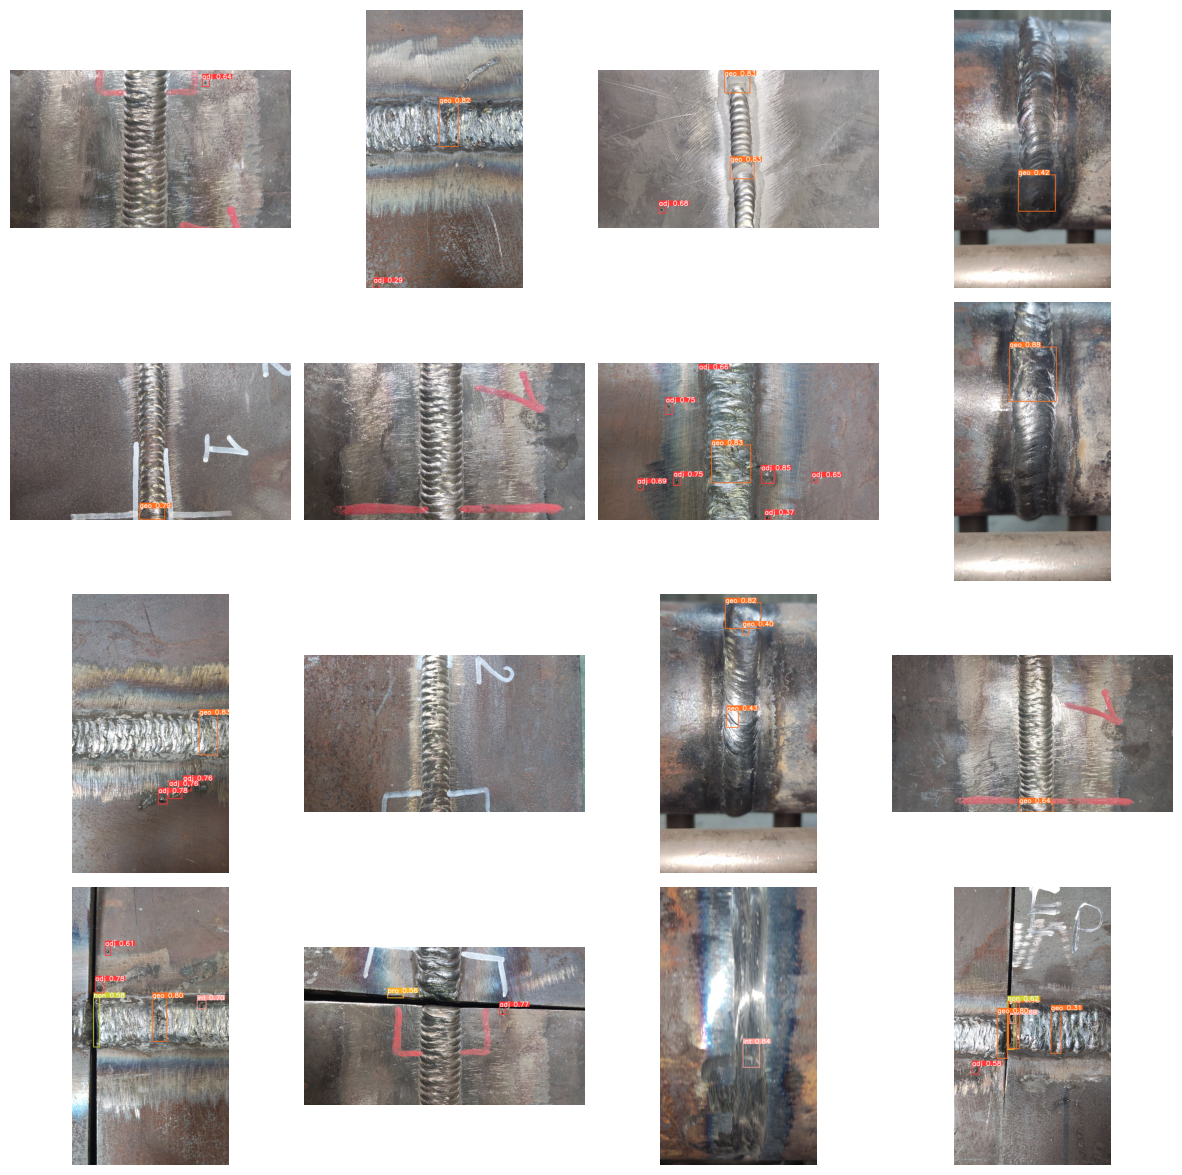

In [28]:
import random
import matplotlib.pyplot as plt

custom_image_dir = '/kaggle/working/yolo_dataset/images/val'

image_files = os.listdir(custom_image_dir)

selected_images = random.sample(image_files, 16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):
    
    row_idx = i // 4
    col_idx = i % 4
    
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = detect(img_path)
    
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')
    
plt.subplots_adjust(wspace=0.05, hspace=0.05)